In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None
plt.style.use('classic')
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-darkgrid')
plt.style.use('dark_background')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/young-people-survey/columns.csv
/kaggle/input/young-people-survey/responses.csv


In [2]:
data = pd.read_csv("../input/young-people-survey/responses.csv")

In [3]:
data.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [4]:
columns = pd.read_csv("../input/young-people-survey/columns.csv")

### Feature selection for new environment feature

In [5]:
corr = data.corr()

In [6]:
corr['New environment'].nlargest(20)

New environment             1.000000
Socializing                 0.409969
Energy levels               0.346369
Number of friends           0.272655
Interests or hobbies        0.251919
Adrenaline sports           0.196641
Happiness in life           0.192686
Assertiveness               0.177083
Personality                 0.162159
Active sport                0.157910
Fun with friends            0.156012
Knowing the right people    0.141906
Waiting                     0.141733
Cars                        0.135509
Loss of interest            0.135483
Dreams                      0.133549
Funniness                   0.133326
Entertainment spending      0.131392
Hiphop, Rap                 0.121219
Spending on gadgets         0.119505
Name: New environment, dtype: float64

In [7]:
corr['New environment'].nsmallest(20)

Fear of public speaking          -0.289917
Public speaking                  -0.259414
Decision making                  -0.209349
Mood swings                      -0.179121
Life struggles                   -0.167506
Loneliness                       -0.161676
Flying                           -0.142660
Getting angry                    -0.124200
Changing the past                -0.121197
Hypochondria                     -0.118372
Health                           -0.117100
Heights                          -0.102855
Responding to a serious letter   -0.096898
Writing notes                    -0.083542
Darkness                         -0.081945
Snakes                           -0.078791
Dangerous dogs                   -0.078349
Ageing                           -0.076670
Compassion to animals            -0.070574
Finding lost valuables           -0.066143
Name: New environment, dtype: float64

In [8]:
data_res = data

In [9]:
data = data.dropna()
data = data.select_dtypes(include=np.number)
X = data.drop('New environment', axis=1)
Y = data['New environment'].astype('int64')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [12]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

ftsc = pd.DataFrame()
ftsc['feature'] = X.columns
ftsc['score'] = fs.scores_
ftsc = ftsc.sort_values("score",ascending=False)


<AxesSubplot:title={'center':'Most relevant features for classification'}, xlabel='score', ylabel='feature'>

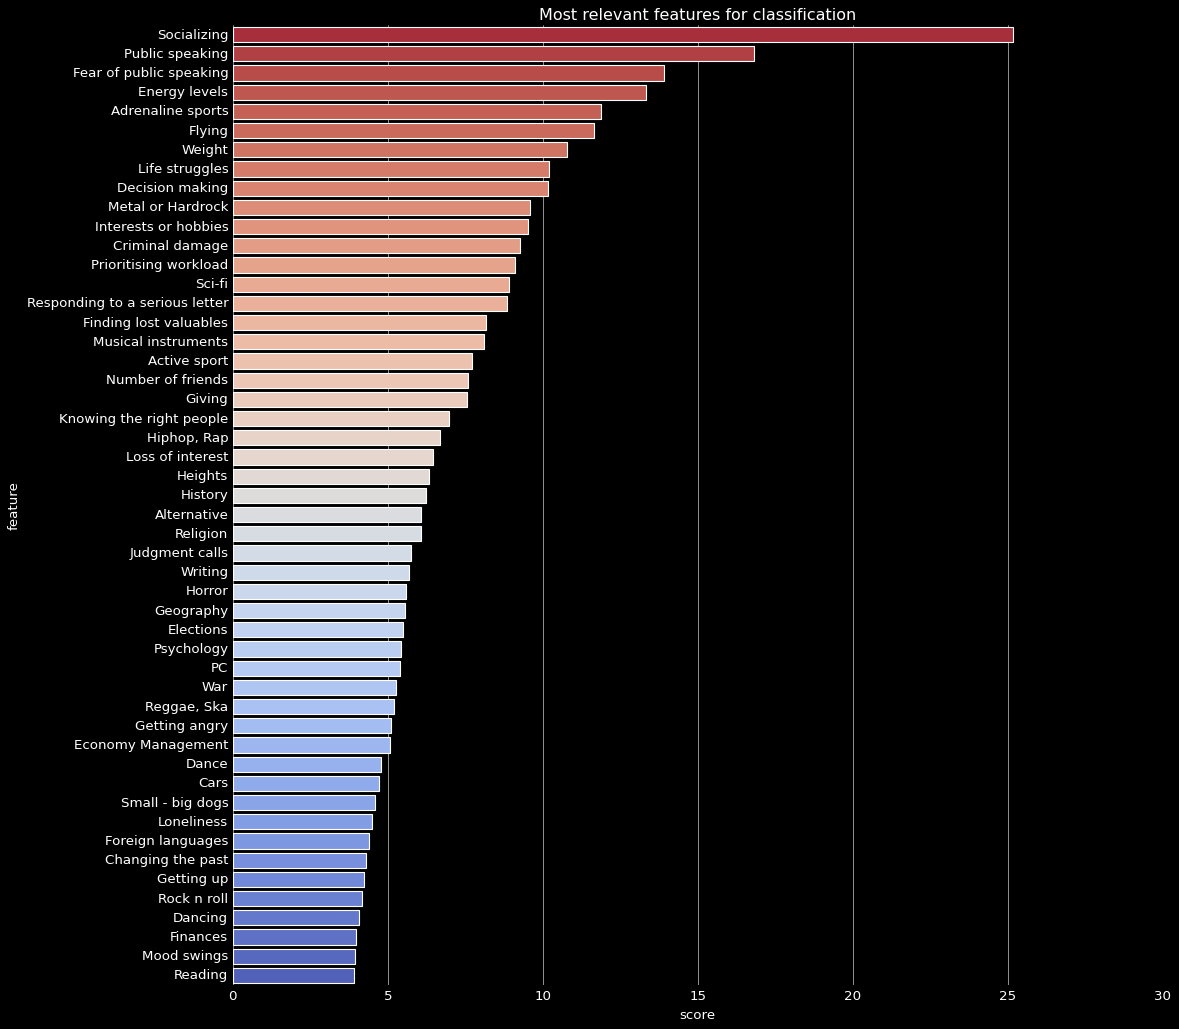

In [13]:
plt.figure(figsize=(15,15))
plt.title("Most relevant features for classification")
sns.barplot(y='feature',x='score', palette='coolwarm_r',data=ftsc.head(50))

In [14]:
np.array(ftsc['feature'].head(15))

array(['Socializing', 'Public speaking', 'Fear of public speaking',
       'Energy levels', 'Adrenaline sports', 'Flying', 'Weight',
       'Life struggles', 'Decision making', 'Metal or Hardrock',
       'Interests or hobbies', 'Criminal damage', 'Prioritising workload',
       'Sci-fi', 'Responding to a serious letter'], dtype=object)

In [15]:
data_res = data_res[['Socializing', 'Public speaking', 'Fear of public speaking',
       'Energy levels', 'Adrenaline sports', 'Flying', 'Weight',
       'Life struggles', 'Decision making', 'Metal or Hardrock',
       'Interests or hobbies', 'Criminal damage', 'Prioritising workload',
       'Sci-fi', 'Responding to a serious letter','New environment']]
data_res = data_res.dropna()

### Feature Binarizer
In order to make modelling more practical, I'm converting the ordinal scale of the features to a binary one based on the premise that 4 or more means agreement.

In [16]:
def Binarizer(num):
    if num <4: 
        return 0
    else:
        return 1

In [17]:
for col in data_res.columns:
    data_res[col] = data_res[col].apply(Binarizer)

In [18]:
X = data_res[['Socializing', 'Public speaking', 'Fear of public speaking',
       'Energy levels', 'Adrenaline sports', 'Flying', 'Weight',
       'Life struggles', 'Decision making', 'Metal or Hardrock',
       'Interests or hobbies', 'Criminal damage', 'Prioritising workload',
       'Sci-fi', 'Responding to a serious letter']]
Y = data_res['New environment']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [19]:
from sklearn.manifold import TSNE
manifold = TSNE(n_components=2, verbose=1, perplexity=1, n_iter=400, random_state=42)
manifold_results = manifold.fit_transform(X)

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 941 samples in 0.002s...
[t-SNE] Computed neighbors for 941 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 941 / 941
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 97.999252
[t-SNE] KL divergence after 400 iterations: 1.619448


In [20]:
manif = pd.DataFrame()
manif['r2'] = manifold_results[:,0]
manif['r1'] = manifold_results[:,1]
manif['class'] = Y

<AxesSubplot:title={'center':'2D Manifold of independent features'}, xlabel='r1', ylabel='r2'>

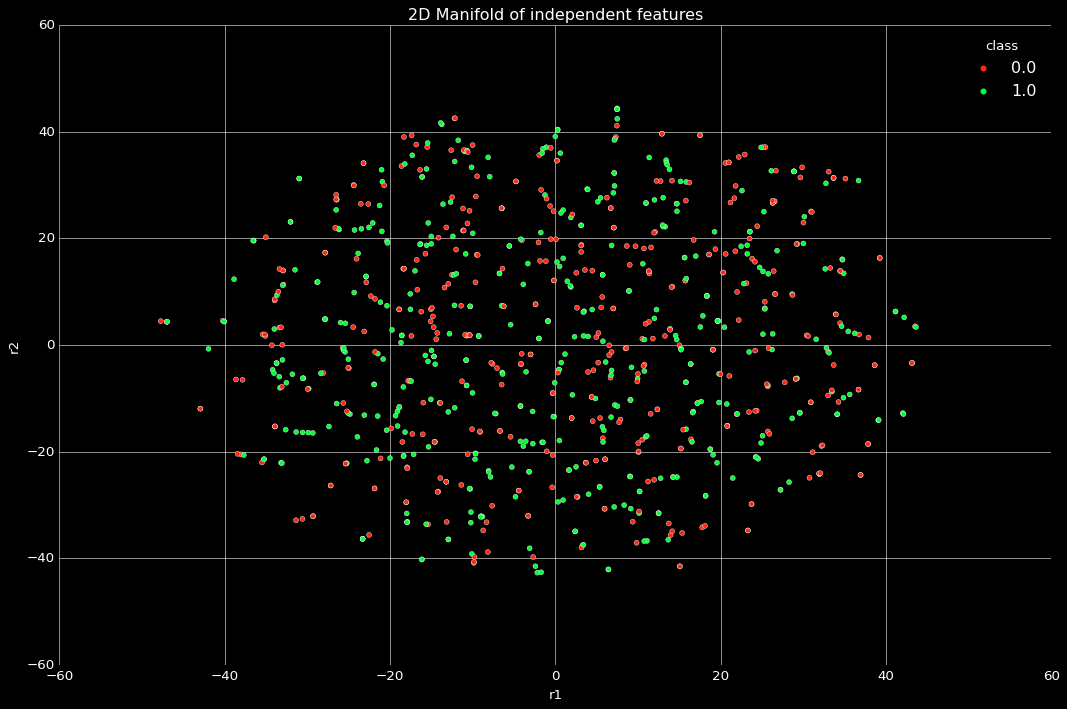

In [21]:
plt.figure(figsize=(16,10))
plt.title("2D Manifold of independent features")
sns.scatterplot(
    x="r1", y="r2",
    hue="class",
    data=manif,
    legend="full",
    palette=['#ff2612','#00ff33'],
    alpha=1
)

In [22]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
clf = make_pipeline(StandardScaler(),
                    SVC(random_state=42, kernel='poly', degree=5, C=0.2, class_weight="balanced"))

In [23]:
clf.fit(np.array(X_train),np.array(y_train))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.2, class_weight='balanced', degree=5, kernel='poly',
                     random_state=42))])

In [24]:
y_pred = clf.predict(X_train)

In [25]:
from sklearn.metrics import f1_score

<br>

#### Model performance on Train data (used for hyperparameter tuning)

In [26]:
f1_score(y_train, y_pred)

0.8264900662251655

In [27]:
from sklearn.metrics import classification_report

In [28]:
classification_report(y_train,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.62      0.74       300\n           1       0.73      0.95      0.83       330\n\n    accuracy                           0.79       630\n   macro avg       0.82      0.78      0.78       630\nweighted avg       0.82      0.79      0.79       630\n'

<br>

#### Model performance on Test data (unseen instances)

In [29]:
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

0.7061728395061728

In [30]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_clf = CalibratedClassifierCV(base_estimator=clf, cv=3)
calibrated_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=Pipeline(steps=[('standardscaler',
                                                       StandardScaler()),
                                                      ('svc',
                                                       SVC(C=0.2,
                                                           class_weight='balanced',
                                                           degree=5,
                                                           kernel='poly',
                                                           random_state=42))]),
                       cv=3)

<br>

#### Deployment preparation

In [31]:
import joblib
  
# Save the model as a pickle in a file
joblib.dump(clf, 'svcmodel.joblib')

['svcmodel.joblib']